In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Generate random data
np.random.seed(0)
X = np.linspace(-5, 5, 100)
y = X**2 + np.random.normal(0, 4, size=100)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

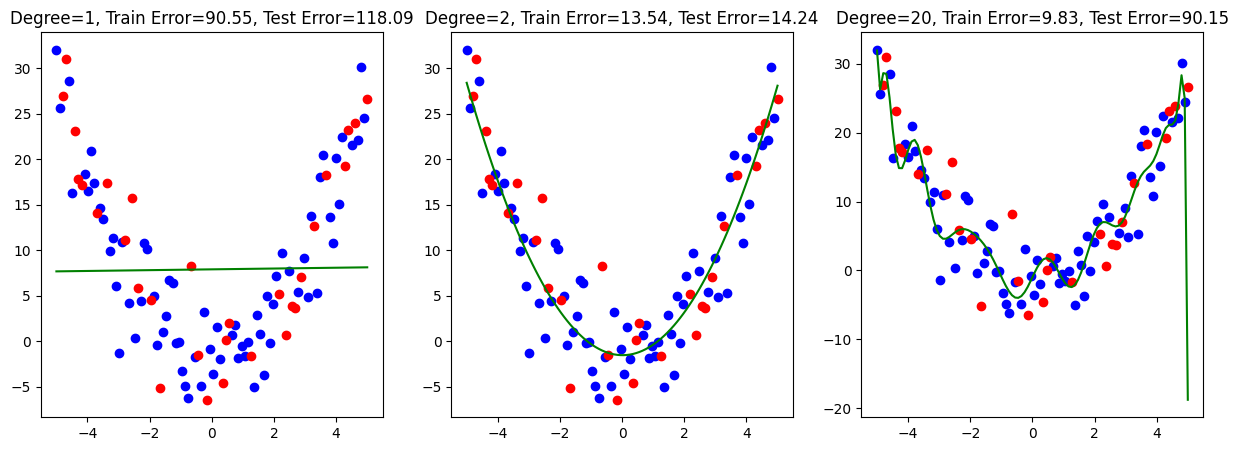

In [7]:
# Fit polynomial regression models with different degrees
degrees = [1, 2, 20]
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):

    # Generating the data
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.transform(X_test.reshape(-1, 1))
    
    # Creating the model
    model = LinearRegression()
    
    # Training the model
    model.fit(X_poly_train, y_train)
    
    # Evaluating the model
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
      # Plotting the results  
    plt.subplot(1, len(degrees), i+1)
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X, model.predict(poly.transform(X.reshape(-1, 1))), color='green')
    plt.title('Degree={}, Train Error={:.2f}, Test Error={:.2f}'.format(degree, train_error, test_error))
plt.show()